# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

In [48]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG, display
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from sklearn.metrics import accuracy_score,precision_score,recall_score

In [49]:
df = pd.read_csv('dataR2.csv')

<p>A existencia de uma correlação entre idade e a existência do cancer de mama</p>
<p>O câncer de mama é mais comum em pessoas com massa corporal maior ou menor?</p>
<p>É mais comum o câncer de mama em pessoas com diabetes?</p>
<p>Por adiponectina ser um hormonio associado a obesidade e diabetes, ele interferiria diretamente nos resultados?</p>


<p>&emsp;&emsp;&emsp;&emsp;O conjunto de dados é formado através de dados coletados de pacientes que procuraram ajuda profissional contra o cancer de mama, esse <em>dataset</em> traz caracteristicas fisiologicas dos pacientes como insulina, glucose, idade e entre outros dados. O objetivo desse banco de dados é buscar possíveis correlações entre as caracteristicas fisiologicas e a presença de cancer de mama, os autores desse banco de dados construiram um artigo que diz que existe uma alta relação entre o alto índice de massa corporea, resistência a insulina,  não-metabolismo de glicose e a secreção de adiponectinas tem uma maior correlação com o cancer de mama </p>

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

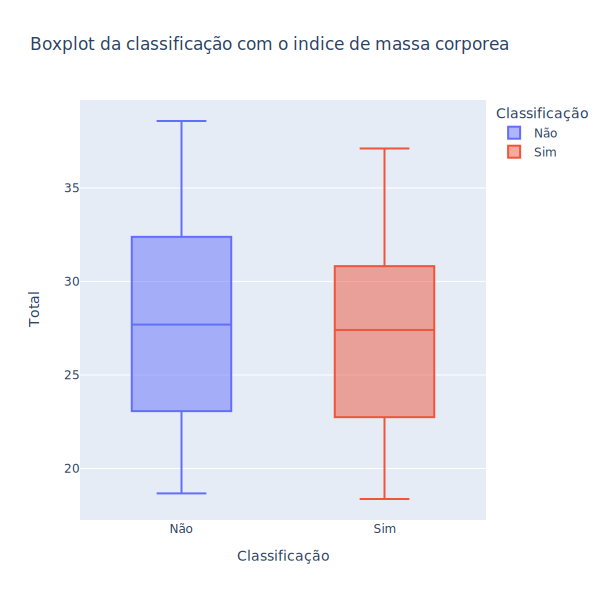

In [50]:
fig = px.box(
    df, x= 'Classification', y = 'BMI',
    color = 'Classification', 
    labels= {'Classification': 'Classificação', 'BMI': 'Indice de massa corporea(BMI)'},
    title = 'Boxplot da classificação com o indice de massa corporea ',
    width=600, height=600
            )
newnames = {'1':'Não', '2':'Sim'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(
                    xaxis = dict(
                                tickvals = ['2', '1'],
                                ticktext = ['Sim', 'Não']
                                ),
                    yaxis_title = 'Total'
                )
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))


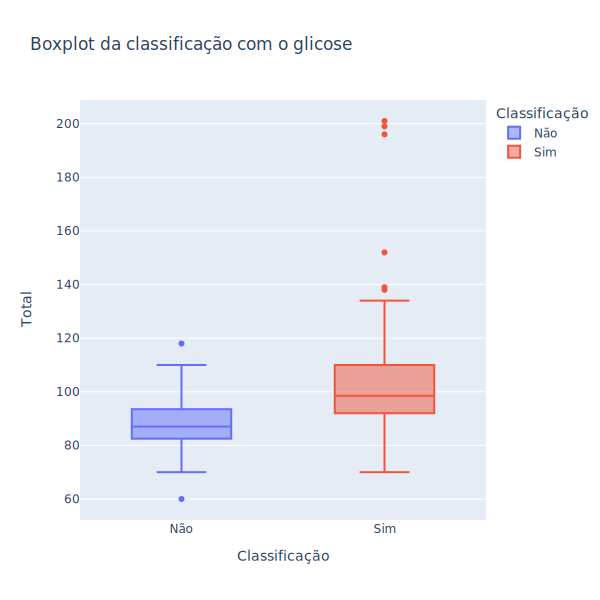

In [51]:
fig =px.box(
        df, x= 'Classification', y = 'Glucose',
        color = 'Classification', 
        labels= {'Classification': 'Classificação', 'Glucose': 'Glicose'}, 
        title = 'Boxplot da classificação com o glicose', 
        width=600, height=600
        )
newnames = {'1':'Não', '2':'Sim'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(
                    xaxis = dict(
                                tickvals = ['2', '1'],
                                ticktext = ['Sim', 'Não']
                                ),
                    yaxis_title = 'Total'
                )
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

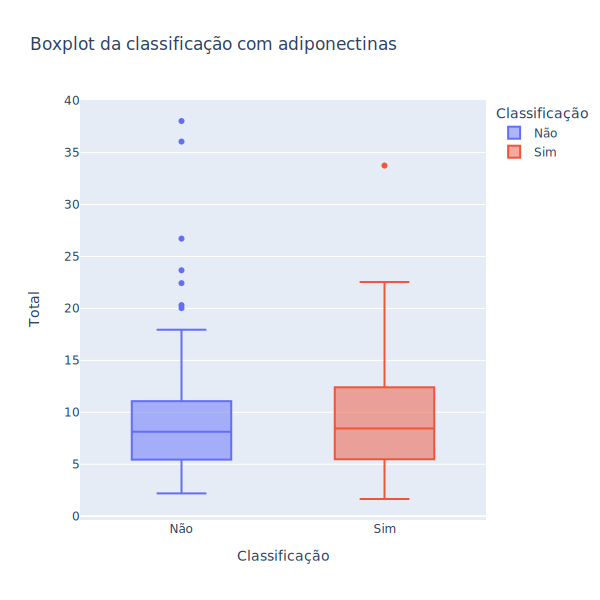

In [52]:
fig = px.box(
        df, x= 'Classification', y = 'Adiponectin',
        color = 'Classification', 
        labels= {'Classification': 'Classificação', 'Adiponectin': 'Adiponectinas'},
        title = 'Boxplot da classificação com adiponectinas', 
        width=600, height=600
)
newnames = {'1':'Não', '2':'Sim'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(
                    xaxis = dict(
                                tickvals = ['2', '1'],
                                ticktext = ['Sim', 'Não']
                                ),
                    yaxis_title = 'Total'
                )
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

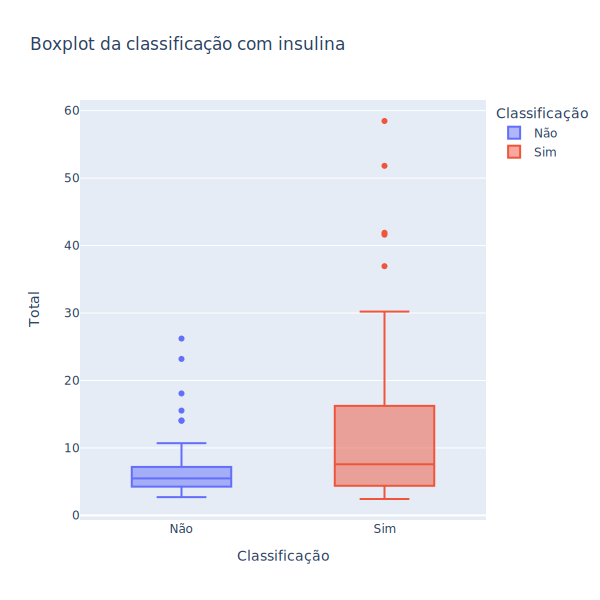

In [53]:
fig = px.box(
    df, x= 'Classification', y = 'Insulin',
    color = 'Classification',
    labels= {'Classification': 'Classificação', 'Insulin': 'Insulina'}, 
    title = 'Boxplot da classificação com insulina', 
    width=600, height=600
     )
newnames = {'1':'Não', '2':'Sim'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(
                    xaxis = dict(
                                tickvals = ['2', '1'],
                                ticktext = ['Sim', 'Não']
                                ),
                    yaxis_title = 'Total'
                )
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

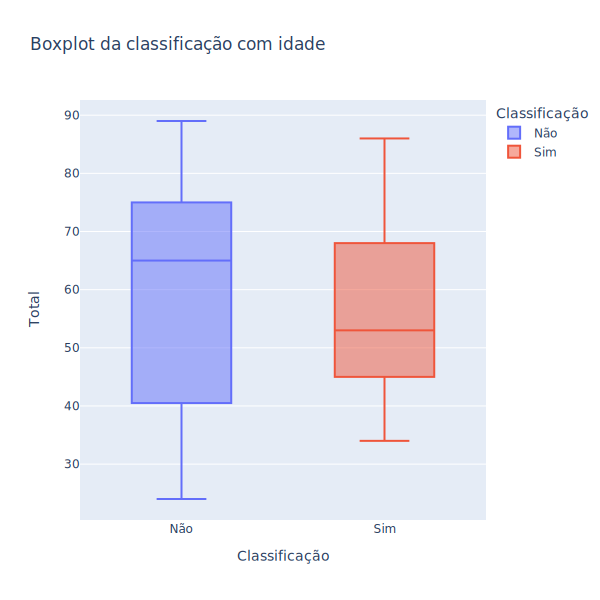

In [54]:
fig = px.box(
    df, x= 'Classification', y = 'Age',
    color = 'Classification',
    labels= {'Classification': 'Classificação', 'Age': 'Idade'}, 
    title = 'Boxplot da classificação com idade', 
    width=600, height=600
    )
newnames = {'1':'Não', '2':'Sim'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(
                    xaxis = dict(
                                tickvals = ['2', '1'],
                                ticktext = ['Sim', 'Não']
                                ),
                    yaxis_title = 'Total'
                )
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

<h3>1.</h3>
<h4>1.1 - Gráfico de Massa Corporea - BMI (Body Mass Index ou Índice de Massa Corporal - IMC)</h4>
<p>&emsp;&emsp;&emsp;&emsp;De acordo com <em>Centers of Disease Control and Prevention</em> - CDC (2021) uma pessoa pode ser classificada como:</p>
<p>
    <ul>
        <li>Se a sua taxa de IMC é menos do que 18.5, você pode ser considerado como abaixo do peso</li>
        <li>Se a sua taxa de IMC está entre 18.5 e 25, você está no seu peso ideal</li>
        <li>Se a sua taxa de IMC está entre 25 e 30, você pode ser considerado acima do peso</li>
        <li>Se a sua taxa de IMC está acima de 30, você é considerado obeso</li>
    </ul>
<p>&emsp;&emsp;&emsp;&emsp;A subclasse do abaixo do peso e do acima do pose podem ser divididas em subclasses para serem melhores estudadas, porém neste trabalho será considerado apenas os valores principais, a partir dessa análise pode-se considerar que a taxa do acima do peso já está entre a média e o terceiro quartil, portanto é necessário uma análise mais precisa, dividindo os grupos em acima do peso e obesidade e peso ideal e abaixo do peso para que seja analisado o comportamento do gráfico</p>
</p>
<h4>1.2 - Gráfico de Glicose</h4>
<p>&emsp;&emsp;&emsp;&emsp;O gráfico de glicose reflete bastante o que foi comentado pelos artigos dos autores dessa base de dados, que é que a quantidade de glicose afeta diretamente o caso de câncer de mama e isso se torna verdadeiro.</p>
<p>&emsp;&emsp;&emsp;&emsp;De acordo com a Socidade Brasileira de Diabetes (2019), para a análise de dados a taxa normal de glicose no sangue é inferior a 100 mg/dL, para os paciêntes que não apresentam câncer de mama, sua grande maioria está dentro da média, sendo que a maioria dos dados está dentro da <em>upper fence</em>, sendo que a mesma tem valor de 110 mg/dL, caracterizando uma glicemia alterada (glicose entre 100 e 125 mg/dL). Todavia os dados que estão agrupados na parte dos que são diagnosticados que tem cancer de mama, é perceptivel que há uma alta taxa de glicose, sendo que a mediana desse conjunto é de 98.5 e o valor de 75% do conjunto é de 110, caracterizando que o inicio da glicemia alterada já está em, no mínimo, 50% dos dados. Vale destacar que nesse banco de dados, 9.48% dos pacientes são diabeticos (glicose acima de 126 mg/dL).</p>
<h4>1.3 - Gráfico das Adiponectinas</h4>
<p>&emsp;&emsp;&emsp;&emsp;De acordo com a Carballo, Pinto e Brito (2020) a adiponectina é um hormômino que tem função principal a de regularização metabolíca no organismo, ajudando o fígado, nos musculos como anti-inflamátoria e vasculoprotetora e tem função de cardioprotetor enquanto na presença de síndrome de isquemia e reperfusão. Os índices normais de adiponectina são determinados pela <em>Cleveland Clinic</em>(2022, traduzido) que são:</p>

<p>Masculino:</p>

<ul>
    <li>IMC inferior a 25: 5 a 37 Ug/mL</li>
    <li>IMC entre 25 e 30: 5 a 28 Ug/mL</li>
    <li>IMC acima de 30: 2 a 20 Ug/mL</li>
</ul>

<p>Feminino:</p>
<ul>
    <li>IMC inferior a 25: 5 a 37 Ug/mL</li>
    <li>IMC entre 25 e 30: 4 a 20 Ug/mL</li>
    <li>IMC acima de 30: 4 a 22 Ug/mL</li>
</ul>

<p>&emsp;&emsp;&emsp;&emsp;Para utilização deste trabalho e falta de dados sobre gênero, causou uma utilização dos intervalos da seguinte maneira:</p>
<p>IMC entre 25 e 30 será utilizado de 5 a 20, pois o intervalo contempla os dois gêneros</p>
<p>IMC acima 30 será utilizado entre 4 e 20, pela mesma causa do intervalo anterior</p>

<p>&emsp;&emsp;&emsp;&emsp; </p>
<h4>1.4 - Gráfico das Insulinas</h4>
<p>&emsp;&emsp;&emsp;&emsp;A insulina é um dos hormônios que o pâncreas usa para o controle da glicose no corpo, geralmente a insulina é ativada quando existe glicose dentro do corpo. A insulina geralmente não é analisada de forma isolada, existem vários fatores que devem ser analisados com a insulina, como IMC, Glicose, e dentre outros. Porém será analisádo apenas o índice HOMA que é uma relação entre a insulina e a glicose, por isso, as análises a seguir serão feitas em torno da coluna HOMA e não da coluna insulina, pois como citado anteriormente, ela não tem impacto direto no corpo humano, porém, ela será testada como variável no modelo como experimento com finalidade de verificar a melhoria de resultados (Singh, 2013).</p>

<h3>2.</h3>
<ol>
<p><li>O índice de massa corporea influenciaria de que forma para a propagração do cancer de mama? </p></li>
<p><li>Como funcionaria um gráfico entre a insulina e a glicose?</p></li>
<p><li>Como seria o comportamento do gráfico de adiponectina sem os outliers?</p></li>
<p><li>Retirar os outliers seria uma alternativa viável para a quantidade de dados apresentados?</p></li>
</ol>

<h3>3.</h3>
<p>Me incomoda bastante essa relação de idade, eu esperava que o cancer de mama tivesse alguma correlação com idade, mas parece que essa correlação é fraca (Resposta = depois dos testes, sim idade é uma variável com correlação fraca)</p>
<p>Queria entender o porque do autor dizer que a correlação de adiponectinas e massa corporea e nos gráficos a relação entre os pacientes que não tem câncer de mama e tem câncer de mama(Resposta = depois dos testes, dá para concluir que estatisticamente os dados se comportam "bem", porém, quando analisados no contexto médico, a história muda totalmente de cenário) </p>

___________________________________________________________________________________________________________________________________________________________________________________________________


<p>&emsp;&emsp;&emsp;&emsp;Eu iria analisar a existencia dos outliers em cada conjunto, depois analisaria cada conjunto com e sem os outliers e ver se os resultados são parecidos, basicamente eu iria gerar um código que iria ver a porcentagem de outliers e também iria gerar um gráfico de <em>scatterplot</em> entre insulina vs glicose com coloração partindo da classificação para ver o comportamento dessas duas variáveis dentro do mesmo gráfico.</p>
___________________________________________________________________________________________________________________________________________________________________________________________________


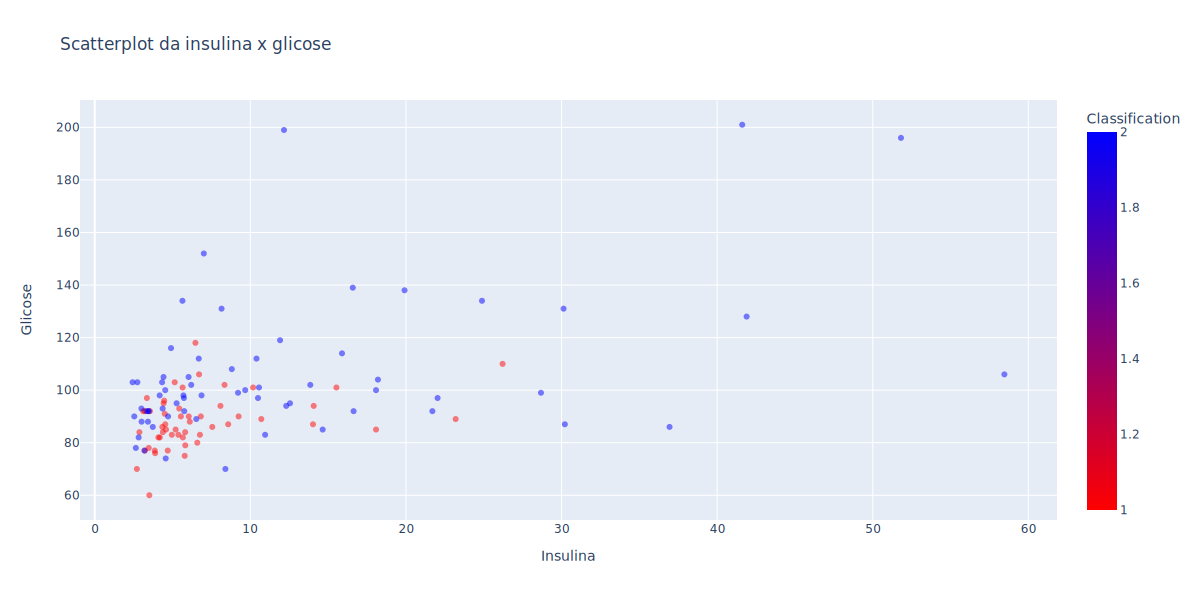

In [55]:
fig = px.scatter(df, x= 'Insulin', y = 'Glucose', color = 'Classification', 
                color_continuous_scale='Bluered_r',
                labels= {'Glucose': 'Glicose', 'Insulin': 'Insulina'}, 
                title = 'Scatterplot da insulina x glicose', 
                width=1200, height=600, opacity=0.5)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

In [56]:
valores_bool1 =  df['Glucose'].astype('int64')

for i in range(len(df)):
    if df.loc[i,'Glucose'] <= 70:
        valores_bool1[i] =  'Hipoglicemia'
    elif 70 <= df.loc[i,'Glucose'] < 100:
        valores_bool1[i] =  'Glicemia normal'
    elif 100 <= df.loc[i,'Glucose'] <= 125:
        valores_bool1[i] =  'Pré-diabetes'
    else:
        valores_bool1[i] =  'Diabetes'            

valores_bool1 = pd.concat([df['Classification'],valores_bool1], axis = 1)
valores_bool1['Classification'].replace({1: 'Sem Câncer',2:'Com Câncer'}, inplace = True)
print('Total de pessoas com e sem cancer de acordo com a glicose:\n',valores_bool1.groupby('Classification')['Glucose'].value_counts(normalize = True))

Total de pessoas com e sem cancer de acordo com a glicose:
 Classification  Glucose        
Com Câncer      Glicemia normal    0.515625
                Pré-diabetes       0.296875
                Diabetes           0.171875
                Hipoglicemia       0.015625
Sem Câncer      Glicemia normal    0.807692
                Pré-diabetes       0.153846
                Hipoglicemia       0.038462
Name: Glucose, dtype: float64


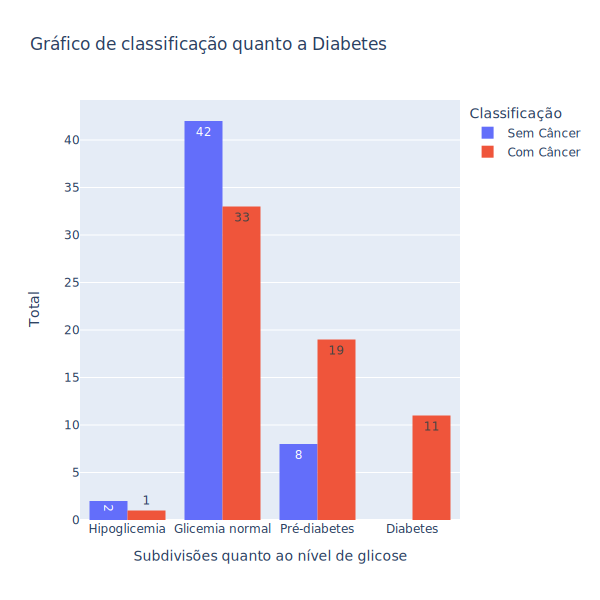

In [57]:
fig = px.histogram(
    valores_bool1, x= 'Glucose', barmode='group',
    color = 'Classification', text_auto=True,
    labels= {'Glucose': 'Subdivisões quanto ao nível de glicose', 'Classification': 'Classificação'}, 
    title = 'Gráfico de classificação quanto a Diabetes', 
    width=600, height=600, 
    ).update_layout(yaxis_title = 'Total')
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

In [58]:
valores_bool2 =  df['BMI'].astype('float64')

for i in range(len(df)):
    if df.loc[i,'BMI'] <= 18.5:
        valores_bool2[i] =  'Abaixo do peso'
    elif 18.5 <= df.loc[i,'BMI'] < 25:
        valores_bool2[i] =  'Peso saudável'
    elif 25 <= df.loc[i,'BMI'] <= 30:
        valores_bool2[i] =  'Acima do peso'
    else:
        valores_bool2[i] =  'Obesidade'    

valores_bool2 = pd.concat([df['Classification'],valores_bool2], axis = 1)
valores_bool2['Classification'].replace({1: 'Sem Câncer',2:'Com Câncer'}, inplace = True)
print('Taxa de pessoas com e sem cancer de acordo com os valores do BMI\n',valores_bool2.groupby('Classification')['BMI'].value_counts(normalize = True))

Taxa de pessoas com e sem cancer de acordo com os valores do BMI
 Classification  BMI           
Com Câncer      Acima do peso     0.359375
                Peso saudável     0.343750
                Obesidade         0.281250
                Abaixo do peso    0.015625
Sem Câncer      Obesidade         0.403846
                Peso saudável     0.326923
                Acima do peso     0.269231
Name: BMI, dtype: float64


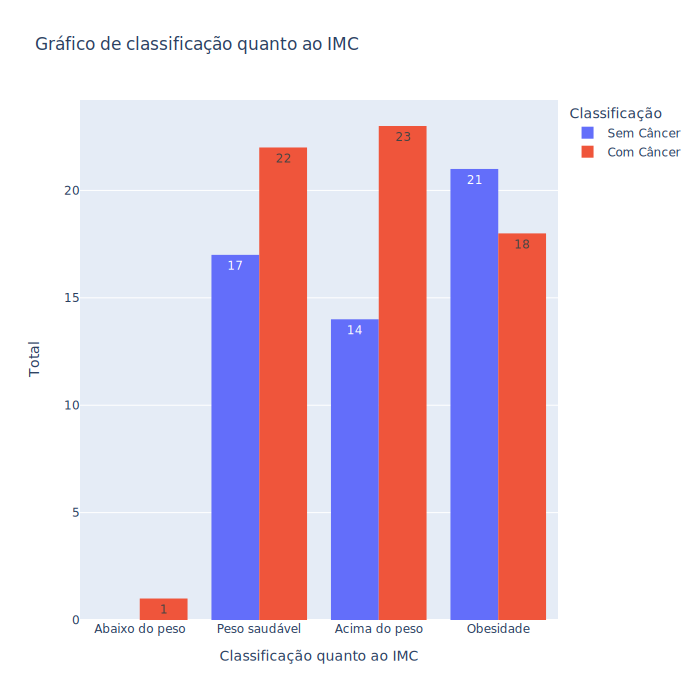

In [59]:
fig = px.histogram(
                valores_bool2, x= 'BMI', barmode='group',
                color = 'Classification', text_auto=True,
                labels= {'BMI': 'Classificação quanto ao IMC', 'Classification': 'Classificação'}, 
                title = 'Gráfico de classificação quanto ao IMC', 
                category_orders=dict(BMI=["Abaixo do peso", "Peso saudável", "Acima do peso", "Obesidade"]),
                width=700, height=700, 
                ).update_layout(yaxis_title = 'Total')
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

In [60]:
valores_bool3 =  df['Adiponectin'].astype('float64')

for i in range(len(df)):
    if (5 <= df.loc[i,'Adiponectin'] <= 37 and df.loc[i,'BMI'] < 25) or (5 <= df.loc[i, 'Adiponectin'] <= 20 and 25 <= df.loc[i,'BMI'] <= 30) or (4 <= df.loc[i, 'Adiponectin'] <= 20 and df.loc[i,'BMI'] > 30):
        valores_bool3[i] =  'Adiponectina não alterada'
    else:
        valores_bool3[i] =  'Adiponectina alterada'

valores_bool3 = pd.concat([df['Classification'],valores_bool3], axis = 1)
valores_bool3['Classification'].replace({1: 'Sem Câncer',2:'Com Câncer'}, inplace = True)
print('Valores de adiponectina que são normais/anormais\n',valores_bool3.groupby('Classification')['Adiponectin'].value_counts(normalize = True)) ###

Valores de adiponectina que são normais/anormais
 Classification  Adiponectin              
Com Câncer      Adiponectina não alterada    0.750000
                Adiponectina alterada        0.250000
Sem Câncer      Adiponectina não alterada    0.846154
                Adiponectina alterada        0.153846
Name: Adiponectin, dtype: float64


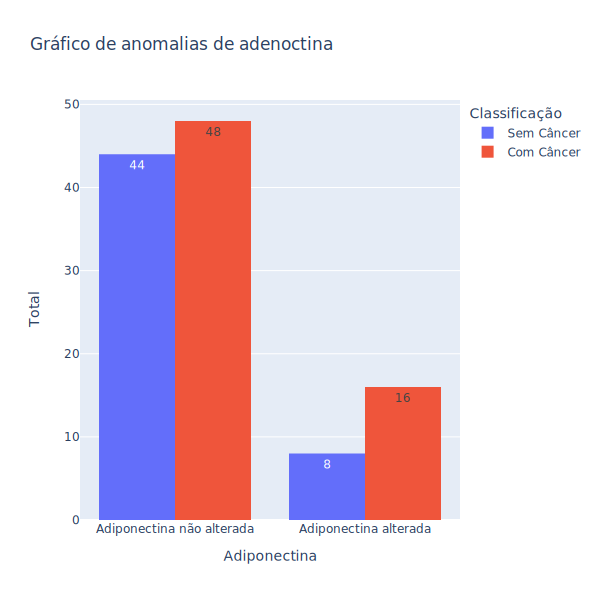

In [61]:
fig = px.histogram(
                valores_bool3, x= 'Adiponectin',  
                color = 'Classification', barmode='group',
                labels= {'Adiponectin': 'Adiponectina', 'Classification': 'Classificação'}, 
                title = 'Gráfico de anomalias de adenoctina', text_auto=True,
                width=600, height=600, 
                ).update_layout(yaxis_title = 'Total')
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

In [62]:
valores_bool4 =  df['HOMA'].astype('float64')

for i in range(len(df)):
    if df.loc[i,'HOMA'] < 2.5:
        valores_bool4[i] =  'Normal'
    else:
        valores_bool4[i] =  'Anormal'

valores_bool4 = pd.concat([df['Classification'],valores_bool4], axis = 1)
valores_bool4['Classification'].replace({1: 'Sem Câncer',2:'Com Câncer'}, inplace = True)
print('\nValores do índice de insulina maiores que 30.212 \n\n',valores_bool4.groupby('Classification')['HOMA'].value_counts(normalize = True)) ###


Valores do índice de insulina maiores que 30.212 

 Classification  HOMA   
Com Câncer      Normal     0.562500
                Anormal    0.437500
Sem Câncer      Normal     0.865385
                Anormal    0.134615
Name: HOMA, dtype: float64


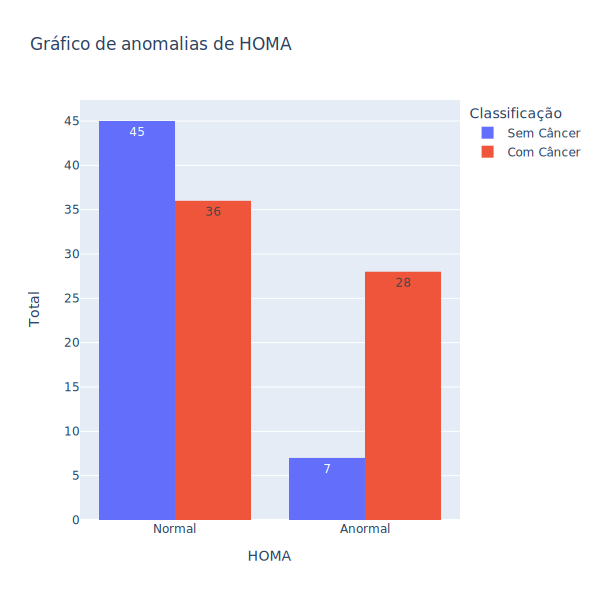

In [63]:
fig = px.histogram(
                valores_bool4, x= 'HOMA',  
                color = 'Classification', barmode='group',
                labels= {'Insulin': 'Taxa de HOMA-IR', 'Classification': 'Classificação'}, 
                title = 'Gráfico de anomalias de HOMA', text_auto=True,
                width=600, height=600, 
                ).update_layout(yaxis_title = 'Total')
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

In [64]:
val_ins_gluc = pd.concat([valores_bool4 , valores_bool1['Glucose']], axis = 1)

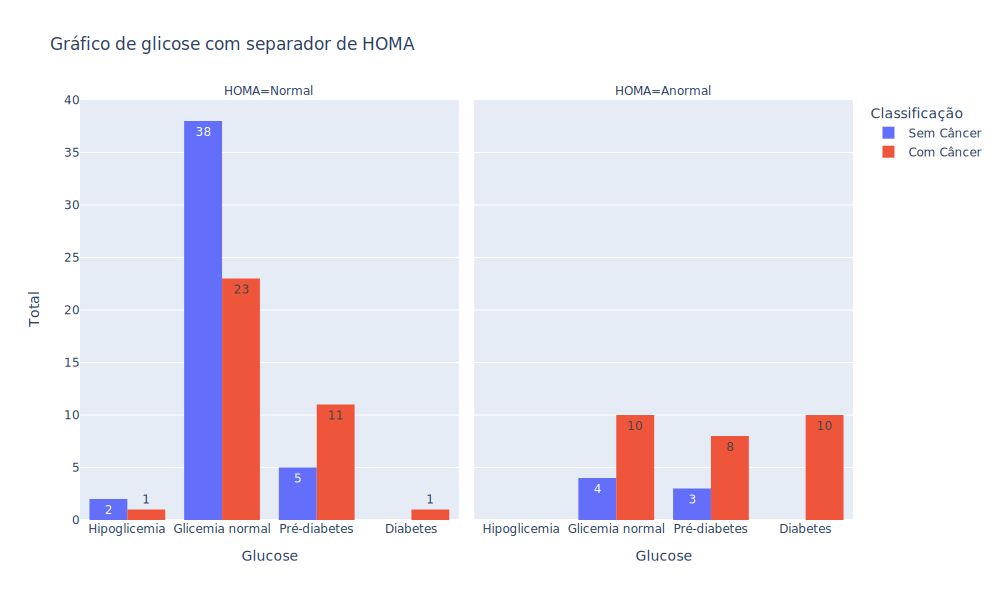

In [65]:
fig = px.histogram(
                val_ins_gluc, x = 'Glucose', facet_col ="HOMA",
                color = 'Classification', barmode='group',
                labels= {'Insulin': 'Taxa HOMA-IR', 'Classification': 'Classificação'}, 
                title = 'Gráfico de glicose com separador de HOMA', text_auto=True,
                width=1000, height=600, 
                ).update_layout(yaxis_title = 'Total')
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

<p>&emsp;&emsp;&emsp;&emsp;Olhando os gráficos gerados é possível detectar alguns outliers de forma visual, pode-se dizer que as pessoas com hipoglicemia podem ser consideradas um outlier, não por impactarem diretamente no resultado do câncer, mas por causa de serem dados insuficiêntes, provavelmente irão afetar o resutado diretamente, alguns possíveis outliers é a única ocorrência de câncer com HOMA normal e com classificação acerca da glicemia como diabete e o outro outlier é a única pessoa que está abaixo do peso.</p>

In [66]:
X = df[['BMI','Adiponectin','Glucose','Insulin']].drop([72,0,47,95])
for i in range(X.columns.value_counts().sum()):
    X.iloc[:,i] = X.iloc[:,i].apply(lambda x: x/X.iloc[:,i].max()) #dados normalizados

In [67]:
y = df[['Classification']].astype('int64').drop([72,0,47,95]) # o drop dessas linhas representa os outliers, já foi analisado retirando o item que foi citado anteriormente como "única ocorrência de câncer com HOMA normal e com classificação acerca da glicemia como diabete", causando uma redução da qualidade do resultado
X = sm.add_constant(X)
y.replace(1, 0, inplace = True)
y.replace(2, 1, inplace=True)

logit_model = sm.Logit(y, X)


c:\Users\augus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [68]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.526961
         Iterations 7


In [69]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         Classification   No. Observations:                  112
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.2334
Time:                        11:01:28   Log-Likelihood:                -59.020
converged:                       True   LL-Null:                       -76.988
Covariance Type:            nonrobust   LLR p-value:                 2.981e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.3935      2.369     -1.855      0.064      -9.036       0.249
BMI            -5.1549      1.926     -2.677      0.007      -8.929      -1.381
Adiponectin    -0.6340      1.231     -0.515    

<p>&emsp;&emsp;&emsp;&emsp;Para fins de projeto, será efetuado dois tipos de modelos, modelo 1 - possuí poucos erros em cima de falsos negativos, ou seja, o modelo erra menos ao dizer ao paciente que o mesmo não tem câncer, quando na verdade ele o tem, modelo 2 - classifica consideralmente melhor que o primeiro as pessoas que não tem cancer, mas o modelo alerta que elas tem (FP). Essa medologia foi abordada para que um paciênte passe primeiro pelo modelo que sabe distinguir melhor os falsos negativos, evitando uma pessoa que não tem câncer de entrar em um tratamento muito pesado e talvez tirando a oportunidade de uma pessoa que precise e depois passando pelo modelo 2, confirmando se essa pessoa não tem câncer</p>

In [70]:
X = df[['BMI','Glucose','Insulin','Adiponectin']].drop([72,0,47,95])
y = np.ravel(df[['Classification']].astype('int64').drop([72,0,47,95]))
y[y == 1] = 0
y[y == 2] = 1
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=10)

lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [71]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito negativo(1)","Predito positivo(2)"],
             index  =["Real negativo(1)","Real positivo(2)"])

<AxesSubplot:>

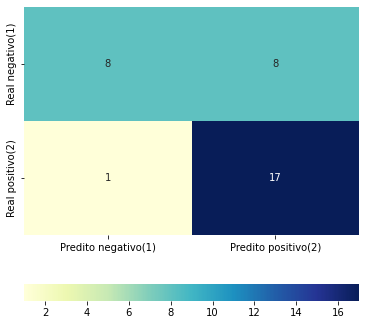

In [72]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu',cbar_kws={"orientation": "horizontal"})

In [73]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() #chama os valores da matriz de confusão
espec =  tn / (tn+fp)

Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [74]:
print('acurácia: {:.03f}'.format(acc))
print('precisão: {:.03f}'.format(prec))
print('especificidade: {:.03f}'.format(espec))
print('sensitividade: {:.03f}'.format(recall))


acurácia: 0.735
precisão: 0.680
especificidade: 0.500
sensitividade: 0.944


In [75]:
X = df[['BMI','Glucose','Insulin','Adiponectin']].drop([72,105])
y = np.ravel(df[['Classification']].astype('int64').drop([72,105]))
y[y == 1] = 0
y[y == 2] = 1
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=10)

lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [76]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito negativo(1)","Predito positivo(2)"],
             index  =["Real negativo(1)","Real positivo(2)"])

<AxesSubplot:>

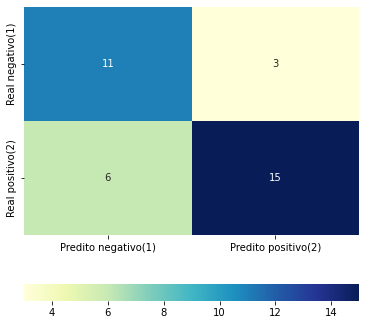

In [77]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu',cbar_kws={"orientation": "horizontal"})

In [78]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
espec =  tn / (tn+fp)
print('acurácia: {:.03f}'.format(acc))
print('precisão: {:.03f}'.format(prec))
print('especificidade: {:.03f}'.format(espec))
print('sensitividade: {:.03f}'.format(recall))

acurácia: 0.743
precisão: 0.833
especificidade: 0.786
sensitividade: 0.714


<p>Depende de qual modelo será analisado:</p>
<p>Modelo 1 - Possui mais dificuldade em classificar erros do tipo 1, que são erros em cima de falsos positivo</p>
<p>Modelo 2 - Possui mais dificuldade em classificar erros do topo 2, que são erros em cima de falsos negativo</p>

<h2>REFERÊNCIAS</h2>

<p>SOCIEDADE BRASILEIRA DE DIABETES. <strong>DIRETRIZES, SOCIEDADE BRASILEIRA DE DIABETES 2019 - 2020</strong>. São Paulo, 2019. Disponível em: http://www.saude.ba.gov.br/wp-content/uploads/2020/02/Diretrizes-Sociedade-Brasileira-de-Diabetes-2019-2020.pdf. Acesso em: 5/5/2022</p>

<p>Singh, Y., Garg, MK., Tandon, N., Marwaha, R.K. <strong>A Study of Insulin Resistance by HOMA-IR and its Cut-off Value to Identify Metabolic Syndrome in Urban Indian Adolescents</strong>. Turkey, 2013. Disponível em: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3890224/#. Acesso em: 5/5/2022</p>

<p><em>Centers for Disease Control and Prevention</em>.<strong> Defining Adult Overweight & Obesity</strong>.Atlanta, 2021. Disponível em: https://www.cdc.gov/obesity/basics/adult-defining.html. Acesso em: 5/5/2022</p>

<p><em>Cleveland Clinic</em>.<strong> Adiponectin</strong>. Cleveland, 2022. Disponível em: https://my.clevelandclinic.org/health/articles/22439-adiponectin#:~:text=Adiponectin%20is%20a%20hormone%20your,Type%202%20diabetes%20and%20atherosclerosis. Acesso em: 5/5/2022</p>